# Madpy survey results

Let's check out the results of the Madpy survey! The survey responses have been deidentified and included in this repo as a csv named "responses-deidentified.csv". Here I'm reading this csv in with `pandas`. The `read_csv()` function returns a `DataFrame` object which I'm calling "results". Just to get a sense of what the data look like, I print the column names and first three rows with the `head()` method available on all `DataFrame` objects.

In [1]:
import pandas
results = pandas.read_csv('responses-deidentified.csv')
results.head(3)

,At what kind of facilities would you like to see the meetup?,At what skill level would you like to see events hosted?,How are you using Python?,How frequently would you be interested in attending MadPy meetings?,How would you prefer to communicate with the group online?,Is alcohol okay at meetups?,Is food okay at meetups?,What day(s) of the week work best for you?,What do you want to get out of a Madison Python meetup?,What format(s) of events would you like to see at MadPy?,What kind(s) of events would you like to see at MadPy?,What other tech meetups do you go to?,What time(s) of day work best for you?,Where in town works best for you to attend the meetup?
0,"Libraries, Offices","Intermediate, Expert","Software (engineering/developing), Science (sc...","A few times a year, Monthly","Email, Slack channel",Yes,Yes,"Monday, Wednesday, Saturday, Sunday",Best practices. Improve my python skills. He...,"Presentations, Hack Nights","Software (engineering/developing), Science (sc...",Big Data Madison (https://www.meetup.com/BigDa...,After work hours (6pm - 9pm),"Downtown, East"
1,"Libraries, Bars, Restaurants, Offices","Introductory, Intermediate, Expert",Science (scientific & numeric computing/data s...,Monthly,"Email, Slack channel",Yes,Yes,"Monday, Wednesday, Sunday",NaN,"Presentations, Python Schooling",Science (scientific & numeric computing/data s...,"MadJS (https://www.meetup.com/MadisonJS), Big ...",After work hours (6pm - 9pm),"Far West, Near West, Downtown"
2,"Libraries, Offices","Introductory, Intermediate, Expert",Science (scientific & numeric computing/data s...,Monthly,Email,depends on location,Yes,Wednesday,NaN,"Presentations, Python Schooling",Science (scientific & numeric computing/data s...,Big Data Madison (https://www.meetup.com/BigDa...,After work hours (6pm - 9pm),Near West


## Renaming columns with (shorter) question ids

The header column is very verbose, including the complete question text. I want to replace these verbose column headers with something shorter, but I still want to keep the complete question text available for reference. The first thing I do is create a more concise map of questions to numbers. Then I can replace the verbose column headers with the shorter values contained in the map.

In [2]:
questions = pandas.DataFrame(dict(question=results.columns))
questions.insert(0, 'id', ['q{}'.format(i) for i in questions.index])

# Prevent output from truncating questions
pandas.set_option('display.max_colwidth', questions.question.apply(len).max().item() + 1)
questions

,id,question
0,q0,At what kind of facilities would you like to see the meetup?
1,q1,At what skill level would you like to see events hosted?
2,q2,How are you using Python?
3,q3,How frequently would you be interested in attending MadPy meetings?
4,q4,How would you prefer to communicate with the group online?
5,q5,Is alcohol okay at meetups?
6,q6,Is food okay at meetups?
7,q7,What day(s) of the week work best for you?
8,q8,What do you want to get out of a Madison Python meetup?
9,q9,What format(s) of events would you like to see at MadPy?


In [3]:
results = pandas.read_csv('responses-deidentified.csv')
results.columns = questions.id
results.head(3)

id,q0,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
0,"Libraries, Offices","Intermediate, Expert","Software (engineering/developing), Science (scientific & numeric...","A few times a year, Monthly","Email, Slack channel",Yes,Yes,"Monday, Wednesday, Saturday, Sunday",Best practices. Improve my python skills. Hear about careers u...,"Presentations, Hack Nights","Software (engineering/developing), Science (scientific & numeric...","Big Data Madison (https://www.meetup.com/BigDataMadison), Data S...",After work hours (6pm - 9pm),"Downtown, East"
1,"Libraries, Bars, Restaurants, Offices","Introductory, Intermediate, Expert","Science (scientific & numeric computing/data science), new user",Monthly,"Email, Slack channel",Yes,Yes,"Monday, Wednesday, Sunday",NaN,"Presentations, Python Schooling","Science (scientific & numeric computing/data science), Web (djan...","MadJS (https://www.meetup.com/MadisonJS), Big Data Madison (http...",After work hours (6pm - 9pm),"Far West, Near West, Downtown"
2,"Libraries, Offices","Introductory, Intermediate, Expert",Science (scientific & numeric computing/data science),Monthly,Email,depends on location,Yes,Wednesday,NaN,"Presentations, Python Schooling",Science (scientific & numeric computing/data science),"Big Data Madison (https://www.meetup.com/BigDataMadison), Data S...",After work hours (6pm - 9pm),Near West


## Melting the data from wide to long

In [4]:
# Label participant
results.insert(0, 'person', ['p{}'.format(i) for i in results.index])
results.head(3)

id,person,q0,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
0,p0,"Libraries, Offices","Intermediate, Expert","Software (engineering/developing), Science (scientific & numeric...","A few times a year, Monthly","Email, Slack channel",Yes,Yes,"Monday, Wednesday, Saturday, Sunday",Best practices. Improve my python skills. Hear about careers u...,"Presentations, Hack Nights","Software (engineering/developing), Science (scientific & numeric...","Big Data Madison (https://www.meetup.com/BigDataMadison), Data S...",After work hours (6pm - 9pm),"Downtown, East"
1,p1,"Libraries, Bars, Restaurants, Offices","Introductory, Intermediate, Expert","Science (scientific & numeric computing/data science), new user",Monthly,"Email, Slack channel",Yes,Yes,"Monday, Wednesday, Sunday",NaN,"Presentations, Python Schooling","Science (scientific & numeric computing/data science), Web (djan...","MadJS (https://www.meetup.com/MadisonJS), Big Data Madison (http...",After work hours (6pm - 9pm),"Far West, Near West, Downtown"
2,p2,"Libraries, Offices","Introductory, Intermediate, Expert",Science (scientific & numeric computing/data science),Monthly,Email,depends on location,Yes,Wednesday,NaN,"Presentations, Python Schooling",Science (scientific & numeric computing/data science),"Big Data Madison (https://www.meetup.com/BigDataMadison), Data S...",After work hours (6pm - 9pm),Near West


In [5]:
responses = pandas.melt(results, 'person', var_name='question', value_name='response_str')
responses.head(3)

,person,question,response_str
0,p0,q0,"Libraries, Offices"
1,p1,q0,"Libraries, Bars, Restaurants, Offices"
2,p2,q0,"Libraries, Offices"


In [6]:
responses.sort_values(['person', 'question']).head(3)

,person,question,response_str
0,p0,q0,"Libraries, Offices"
85,p0,q1,"Intermediate, Expert"
850,p0,q10,"Software (engineering/developing), Science (scientific & numeric..."


In [7]:
def melt_responses(response_strs):
    """Given a Series of response strings return a DataFrame with one response per row.
    
    An example response str is 'Libraries, Offices'. The resulting DataFrame would have
    two rows, one for each response item.
    """
    response_list = [split_response(response, ix)
                     for ix, response in response_strs.iteritems()]
    response_ser = pandas.concat(response_list)
    response_df = response_ser.reset_index(level='response_n')
    return response_df

def split_response(response_str, ix):
    try:
        responses = [response.strip() for response in response_str.split(',')]
    except AttributeError:
        responses = [response_str]
    
    
    index_pairs = zip([ix]*len(responses), range(len(responses)))
    multi_index = pandas.MultiIndex.from_tuples(list(index_pairs),
                                                names=['index', 'response_n'])        
    return pandas.Series(responses, index=multi_index, name='response')

melted_responses = melt_responses(responses.response_str)
melted_responses.head()

,response_n,response
index,,
0,0,Libraries
0,1,Offices
1,0,Libraries
1,1,Bars
1,2,Restaurants


In [8]:
responses = responses.merge(melted_responses, left_index=True, right_index=True)
responses.head()

,person,question,response_str,response_n,response
0,p0,q0,"Libraries, Offices",0,Libraries
0,p0,q0,"Libraries, Offices",1,Offices
1,p1,q0,"Libraries, Bars, Restaurants, Offices",0,Libraries
1,p1,q0,"Libraries, Bars, Restaurants, Offices",1,Bars
1,p1,q0,"Libraries, Bars, Restaurants, Offices",2,Restaurants


In [9]:
del responses['response_str']
responses.set_index('question', inplace=True)
responses.head()

,person,response_n,response
question,,,
q0,p0,0,Libraries
q0,p0,1,Offices
q0,p1,0,Libraries
q0,p1,1,Bars
q0,p1,2,Restaurants


In [10]:
%matplotlib inline
import seaborn

def plot_counts(question_id):
    seaborn.countplot(responses.ix[question_id, 'response'])

/Users/work/.venvs/madpy/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [11]:
questions

,id,question
0,q0,At what kind of facilities would you like to see the meetup?
1,q1,At what skill level would you like to see events hosted?
2,q2,How are you using Python?
3,q3,How frequently would you be interested in attending MadPy meetings?
4,q4,How would you prefer to communicate with the group online?
5,q5,Is alcohol okay at meetups?
6,q6,Is food okay at meetups?
7,q7,What day(s) of the week work best for you?
8,q8,What do you want to get out of a Madison Python meetup?
9,q9,What format(s) of events would you like to see at MadPy?


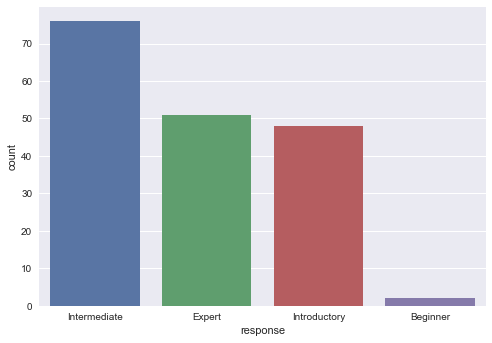

In [12]:
plot_counts('q1')

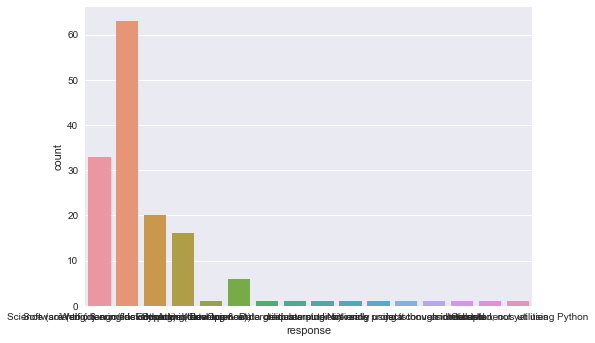

In [13]:
plot_counts('q2')

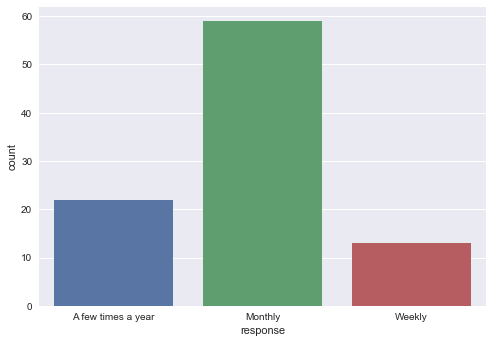

In [14]:
plot_counts('q3')

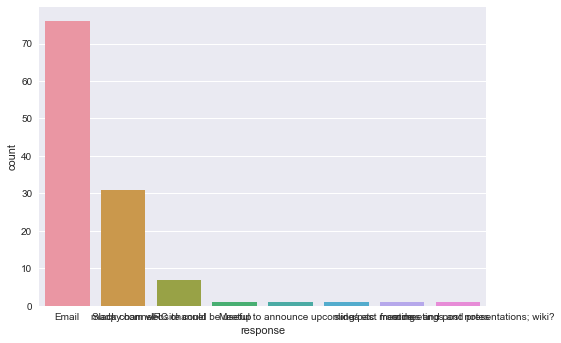

In [15]:
plot_counts('q4')

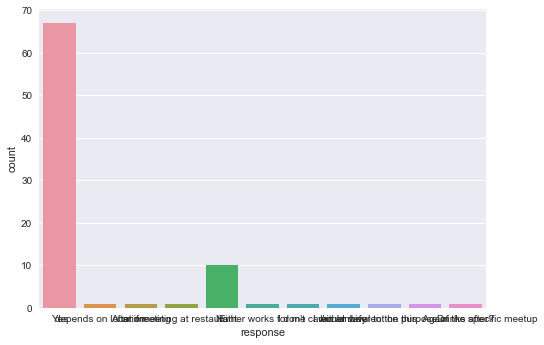

In [16]:
plot_counts('q5')

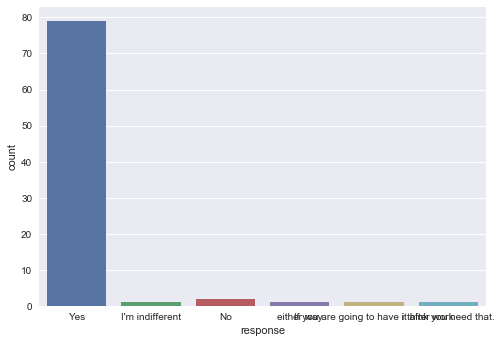

In [17]:
plot_counts('q6')

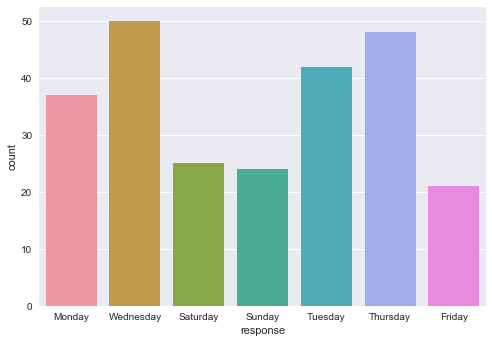

In [18]:
plot_counts('q7')

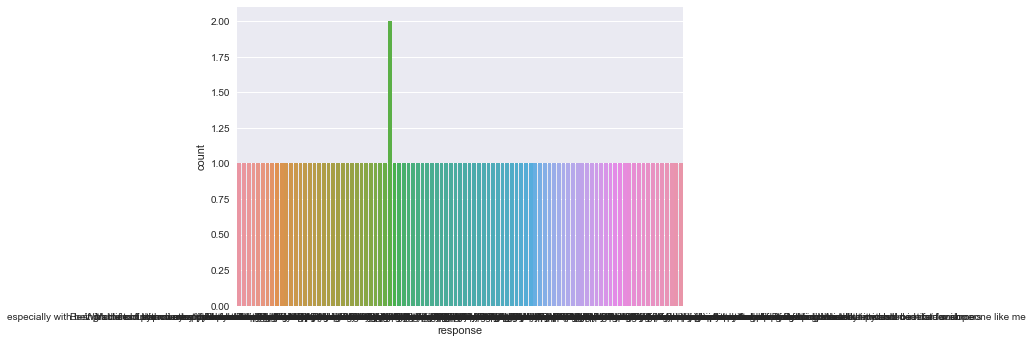

In [19]:
plot_counts('q8')

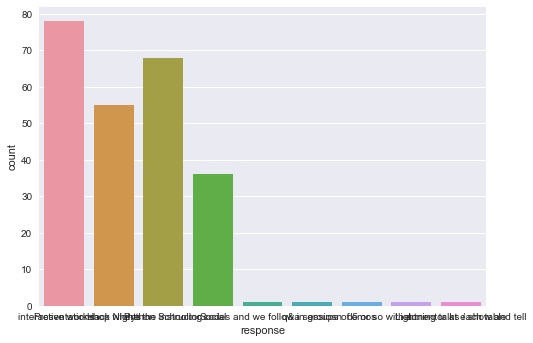

In [20]:
plot_counts('q9')

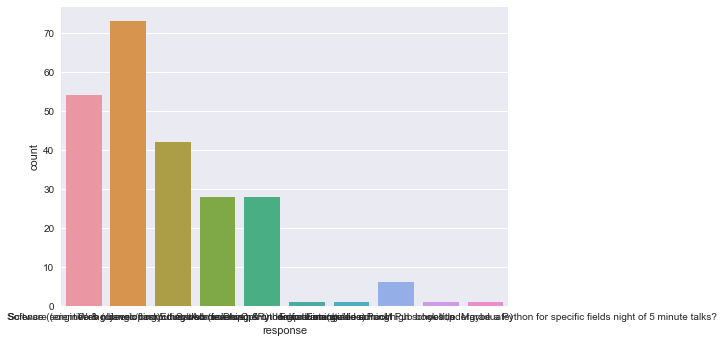

In [21]:
plot_counts('q10')

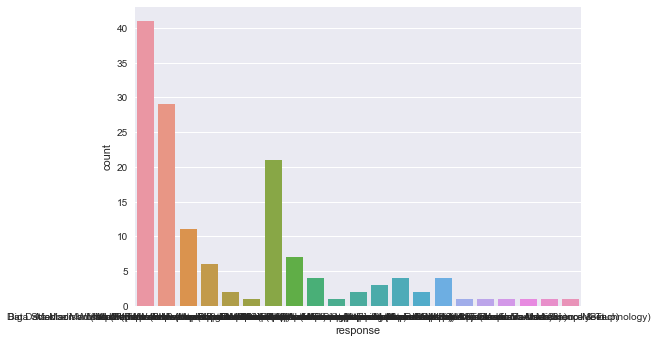

In [22]:
plot_counts('q11')

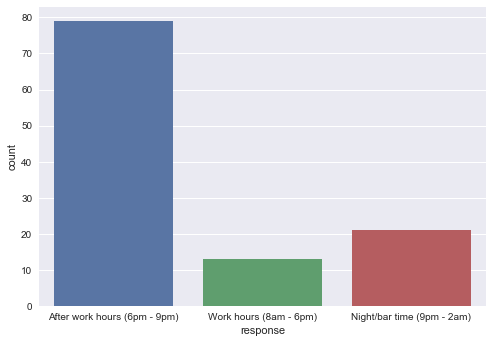

In [23]:
plot_counts('q12')

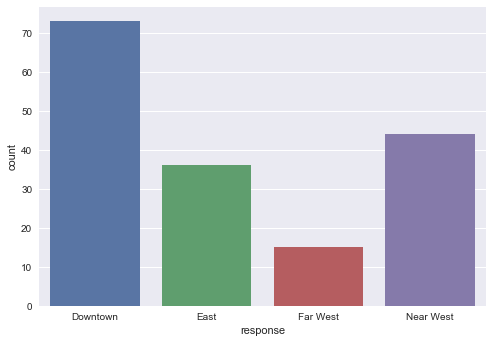

In [24]:
plot_counts('q13')